# Python Project

In [1]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests, time
import plotly

In [2]:
# analize each thirds
# proportions for small, med and big delays
# flight counts by month

In [3]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('airport_data.csv')
print(df.shape)
df.head()

(6489062, 33)


,MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0.0,0,0800-0859,258.0,2,NaN,NaN,NaN,NaN,NaN,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0.0,0,0700-0759,1747.0,7,NaN,NaN,NaN,NaN,NaN,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0.0,0,0600-0659,1747.0,7,NaN,NaN,NaN,NaN,NaN,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0.0,0,0600-0659,2248.0,9,NaN,NaN,NaN,NaN,NaN,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0.0,0,0001-0559,1514.0,7,NaN,NaN,NaN,NaN,NaN,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [4]:
df.isnull().sum().reset_index().head(32)

,index,0
0,MONTH,0
1,DAY_OF_WEEK,0
2,DEP_DELAY_NEW,0
3,DEP_DEL15,0
4,DEP_TIME_BLK,0
5,DISTANCE,0
6,DISTANCE_GROUP,0
7,CARRIER_DELAY,5242063
8,WEATHER_DELAY,5242063
9,NAS_DELAY,5242063


In [5]:
# Delay Flags ranges

cd = df[df['CARRIER_DELAY']>0].CARRIER_DELAY
wd = df[df['WEATHER_DELAY']>0].WEATHER_DELAY
nd = df[df['NAS_DELAY']>0].NAS_DELAY
sd = df[df['SECURITY_DELAY']>0].SECURITY_DELAY
ld = df[df['LATE_AIRCRAFT_DELAY']>0].LATE_AIRCRAFT_DELAY

print(f'Carrier Delay min:{cd.min()} max:{cd.max()}')
print(f'Weather Delay min:{wd.min()} max:{wd.max()}')
print(f'NAS Delay min:{nd.min()} max:{nd.max()}')
print(f'Security Delay min:{sd.min()} max:{sd.max()}')
print(f'Late Aircraft Delay min:{ld.min()} max:{ld.max()}')

Carrier Delay min:1.0 max:2695.0
Weather Delay min:1.0 max:1575.0
NAS Delay min:1.0 max:1711.0
Security Delay min:1.0 max:1078.0
Late Aircraft Delay min:1.0 max:2010.0


In [6]:
df.loc[df['CARRIER_DELAY']>0, 'CARRIER_DELAY'] = 1
df.loc[df['WEATHER_DELAY']>0, 'WEATHER_DELAY'] = 1
df.loc[df['NAS_DELAY']>0, 'NAS_DELAY'] = 1
df.loc[df['SECURITY_DELAY']>0, 'SECURITY_DELAY'] = 1
df.loc[df['LATE_AIRCRAFT_DELAY']>0, 'LATE_AIRCRAFT_DELAY'] = 1

df.loc[df['DEP_DEL15']==0, 'CARRIER_DELAY'] = 0
df.loc[df['DEP_DEL15']==0, 'WEATHER_DELAY'] = 0
df.loc[df['DEP_DEL15']==0, 'NAS_DELAY'] = 0
df.loc[df['DEP_DEL15']==0, 'SECURITY_DELAY'] = 0
df.loc[df['DEP_DEL15']==0, 'LATE_AIRCRAFT_DELAY'] = 0

In [7]:
for delay in ['CARRIER_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY', 'SECURITY_DELAY']:
    df.loc[(df[delay] == 1) & (df['DEP_DELAY_NEW'] >= 15), f'SIZE_{delay}'] = f'SMALL_{delay}'
    df.loc[(df[delay] == 1) & (df['DEP_DELAY_NEW'] > 30), f'SIZE_{delay}'] = f'MEDIUM_{delay}'
    df.loc[(df[delay] == 1) & (df['DEP_DELAY_NEW'] > 60), f'SIZE_{delay}'] = f'BIG_{delay}'

    df.loc[(df[f'SIZE_{delay}'].isna()) & (df['DEP_DEL15']==0), f'SIZE_{delay}'] = 'NO_DELAY'

df.loc[df['DEP_DELAY_NEW'] < 15, f'SIZE_DELAY'] = f'NO_DELAY'
df.loc[df['DEP_DELAY_NEW'] >= 15, f'SIZE_DELAY'] = f'SMALL_DELAY'
df.loc[df['DEP_DELAY_NEW'] > 30, f'SIZE_DELAY'] = f'MEDIUM_DELAY'
df.loc[df['DEP_DELAY_NEW'] > 60, f'SIZE_DELAY'] = f'BIG_DELAY'

In [8]:
df = pd.get_dummies(df, columns=['SIZE_CARRIER_DELAY'])
df = pd.get_dummies(df, columns=['SIZE_WEATHER_DELAY'])
df = pd.get_dummies(df, columns=['SIZE_LATE_AIRCRAFT_DELAY'])

df = df.fillna(0)

In [9]:
for delay in ['CARRIER_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY', 'SECURITY_DELAY']:
    df.loc[(df[delay] == 1) & (df['DEP_DELAY_NEW'] >= 15), f'SIZE_{delay}'] = f'SMALL_{delay}'
    df.loc[(df[delay] == 1) & (df['DEP_DELAY_NEW'] > 30), f'SIZE_{delay}'] = f'MEDIUM_{delay}'
    df.loc[(df[delay] == 1) & (df['DEP_DELAY_NEW'] > 60), f'SIZE_{delay}'] = f'BIG_{delay}'

    df.loc[(df[f'SIZE_{delay}'].isna()) & (df['DEP_DEL15']==0), f'SIZE_{delay}'] = 'NO_DELAY'

In [10]:
df[df['DEP_DEL15']==1].describe()

,MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,SIZE_CARRIER_DELAY_BIG_CARRIER_DELAY,SIZE_CARRIER_DELAY_MEDIUM_CARRIER_DELAY,SIZE_CARRIER_DELAY_NO_DELAY,SIZE_CARRIER_DELAY_SMALL_CARRIER_DELAY,SIZE_WEATHER_DELAY_BIG_WEATHER_DELAY,SIZE_WEATHER_DELAY_MEDIUM_WEATHER_DELAY,SIZE_WEATHER_DELAY_NO_DELAY,SIZE_WEATHER_DELAY_SMALL_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY_BIG_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_MEDIUM_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_NO_DELAY,SIZE_LATE_AIRCRAFT_DELAY_SMALL_LATE_AIRCRAFT_DELAY
count,1.227368e+06,1.227368e+06,1.227368e+06,1227368.0,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1227368.0,1.227368e+06,1.227368e+06,1.227368e+06,1227368.0,1.227368e+06,1.227368e+06,1.227368e+06,1227368.0,1.227368e+06
mean,6.473086e+00,3.934775e+00,6.841584e+01,1.0,8.579677e+02,3.901447e+00,4.521586e-01,5.242275e-02,3.277509e-01,2.700901e-03,4.916618e-01,3.474653e+00,2.823882e+01,1.348790e+02,1.317401e+04,6.321175e+04,3.579936e+03,1.645376e+06,7.828103e+06,9.715877e-05,1.339499e-04,1.162142e+01,3.671139e+01,-9.325033e+01,1.607532e-01,6.451472e-02,1.309154e-01,7.112888e+01,8.721881e+00,1.854603e-01,1.582476e-01,0.0,1.084508e-01,2.879414e-02,1.459790e-02,0.0,9.030706e-03,2.223465e-01,1.709601e-01,0.0,9.835518e-02
std,3.329377e+00,1.992616e+00,8.684447e+01,0.0,6.034997e+02,2.379533e+00,4.977061e-01,2.228781e-01,4.693937e-01,5.189999e-02,4.999307e-01,1.771501e+00,2.129837e+01,4.648374e+01,8.731558e+03,3.510032e+04,4.094565e+03,1.095574e+06,5.043405e+06,8.588854e-05,4.811397e-05,6.765633e+00,5.250422e+00,1.681165e+01,4.325139e-01,4.883145e-01,8.562936e-01,1.924260e+01,3.778255e+00,3.886707e-01,3.649731e-01,0.0,3.109490e-01,1.672276e-01,1.199367e-01,0.0,9.460000e-02,4.158229e-01,3.764743e-01,0.0,2.977944e-01
min,1.000000e+00,1.000000e+00,1.500000e+01,1.0,6.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,1.000000e+00,7.047600e+04,4.737940e+05,0.000000e+00,7.134695e-06,0.000000e+00,1.844000e+01,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,4.000000e+00,2.000000e+00,2.400000e+01,1.0,4.060000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.100000e+01,9.900000e+01,5.847000e+03,2.488600e+04,7.250000e+02,7.325950e+05,2.688839e+06,3.419267e-05,9.889412e-05,5.000000e+00,3.343600e+01,-1.048800e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,6.040000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
50%,6.000000e+00,4.000000e+00,4.100000e+01,1.0,7.110000e+02,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.196500e+04,7.047300e+04,2.566000e+03,1.581456e+06,8.501631e+06,6.178236e-05,1.238227e-04,1.200000e+01,3.761900e+01,-8.790600e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e+01,8.050000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
75%,9.000000e+00,6.000000e+00,8.000000e+01,1.0,1.089000e+03,5.000000e+00,1.

## Delays by Type

In [11]:
# What is the percentage of delays?

df.DEP_DEL15.value_counts(normalize=True)

0    0.810856
1    0.189144
Name: DEP_DEL15, dtype: float64

In [12]:
# How are those delays distributed through causes?

print(df[df['DEP_DEL15']>0].CARRIER_DELAY.value_counts(normalize=True))
print(df[df['DEP_DEL15']>0].WEATHER_DELAY.value_counts(normalize=True))
print(df[df['DEP_DEL15']>0].NAS_DELAY.value_counts(normalize=True))
print(df[df['DEP_DEL15']>0].SECURITY_DELAY.value_counts(normalize=True))
print(df[df['DEP_DEL15']>0].LATE_AIRCRAFT_DELAY.value_counts(normalize=True))

# There can be more than one flag for a delay

0.0    0.547841
1.0    0.452159
Name: CARRIER_DELAY, dtype: float64
0.0    0.947577
1.0    0.052423
Name: WEATHER_DELAY, dtype: float64
0.0    0.672249
1.0    0.327751
Name: NAS_DELAY, dtype: float64
0.0    0.997299
1.0    0.002701
Name: SECURITY_DELAY, dtype: float64
0.0    0.508338
1.0    0.491662
Name: LATE_AIRCRAFT_DELAY, dtype: float64


In [13]:
df[(~df['SIZE_CARRIER_DELAY'].isna()) & (df['SIZE_CARRIER_DELAY']!='NO_DELAY')].SIZE_CARRIER_DELAY.value_counts(normalize=True)

BIG_CARRIER_DELAY       0.410166
MEDIUM_CARRIER_DELAY    0.349982
SMALL_CARRIER_DELAY     0.239851
Name: SIZE_CARRIER_DELAY, dtype: float64

In [14]:
df[(~df['SIZE_WEATHER_DELAY'].isna()) & (df['SIZE_WEATHER_DELAY']!='NO_DELAY')].SIZE_WEATHER_DELAY.value_counts(normalize=True)

BIG_WEATHER_DELAY       0.549268
MEDIUM_WEATHER_DELAY    0.278465
SMALL_WEATHER_DELAY     0.172267
Name: SIZE_WEATHER_DELAY, dtype: float64

In [15]:
df[(~df['SIZE_LATE_AIRCRAFT_DELAY'].isna()) & (df['SIZE_LATE_AIRCRAFT_DELAY']!='NO_DELAY')].SIZE_LATE_AIRCRAFT_DELAY.value_counts(normalize=True)

BIG_LATE_AIRCRAFT_DELAY       0.452235
MEDIUM_LATE_AIRCRAFT_DELAY    0.347719
SMALL_LATE_AIRCRAFT_DELAY     0.200046
Name: SIZE_LATE_AIRCRAFT_DELAY, dtype: float64

(0.0, 300.0)

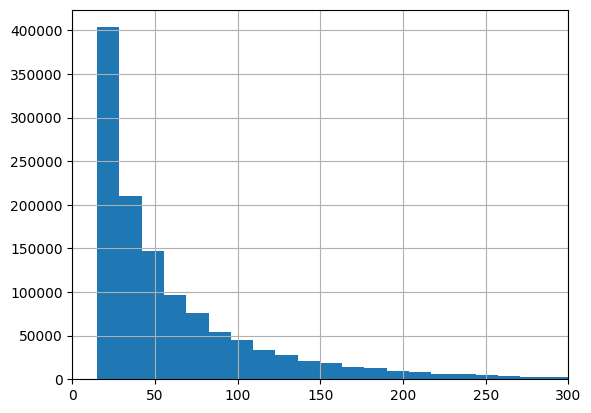

In [16]:
df[(df['DEP_DEL15']==1)].DEP_DELAY_NEW.hist(bins=200)
plt.xlim(0,300)

In [17]:
df.DEP_TIME_BLK.value_counts().sort_values
df.loc[(df['DEP_TIME_BLK']=='0600-0659') | (df['DEP_TIME_BLK']=='0700-0759'), 'DEP_TIME_BLK'] = '0600-0759'
df.loc[(df['DEP_TIME_BLK']=='0800-0859') | (df['DEP_TIME_BLK']=='0900-0959'), 'DEP_TIME_BLK'] = '0800-0959'
df.loc[(df['DEP_TIME_BLK']=='1000-1059') | (df['DEP_TIME_BLK']=='1100-1159'), 'DEP_TIME_BLK'] = '1000-1159'
df.loc[(df['DEP_TIME_BLK']=='1200-1259') | (df['DEP_TIME_BLK']=='1300-1359'), 'DEP_TIME_BLK'] = '1200-1359'
df.loc[(df['DEP_TIME_BLK']=='1400-1459') | (df['DEP_TIME_BLK']=='1500-1559'), 'DEP_TIME_BLK'] = '1400-1559'
df.loc[(df['DEP_TIME_BLK']=='1600-1659') | (df['DEP_TIME_BLK']=='1700-1759'), 'DEP_TIME_BLK'] = '1600-1759'
df.loc[(df['DEP_TIME_BLK']=='1800-1859') | (df['DEP_TIME_BLK']=='1900-1959'), 'DEP_TIME_BLK'] = '1800-1959'
df.loc[(df['DEP_TIME_BLK']=='2000-2059') | (df['DEP_TIME_BLK']=='2100-2159'), 'DEP_TIME_BLK'] = '2000-2159'
df.loc[(df['DEP_TIME_BLK']=='2200-2259') | (df['DEP_TIME_BLK']=='2300-2359'), 'DEP_TIME_BLK'] = '2200-2359'
df.DEP_TIME_BLK.value_counts().sort_values

<bound method Series.sort_values of 0600-0759    866436
0800-0959    848503
1000-1159    792635
1600-1759    777342
1400-1559    764221
1200-1359    751009
1800-1959    733031
2000-2159    563210
2200-2359    244095
0001-0559    148580
Name: DEP_TIME_BLK, dtype: int64>

In [18]:
df

,MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,SIZE_SECURITY_DELAY,SIZE_DELAY,SIZE_CARRIER_DELAY_BIG_CARRIER_DELAY,SIZE_CARRIER_DELAY_MEDIUM_CARRIER_DELAY,SIZE_CARRIER_DELAY_NO_DELAY,SIZE_CARRIER_DELAY_SMALL_CARRIER_DELAY,SIZE_WEATHER_DELAY_BIG_WEATHER_DELAY,SIZE_WEATHER_DELAY_MEDIUM_WEATHER_DELAY,SIZE_WEATHER_DELAY_NO_DELAY,SIZE_WEATHER_DELAY_SMALL_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY_BIG_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_MEDIUM_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_NO_DELAY,SIZE_LATE_AIRCRAFT_DELAY_SMALL_LATE_AIRCRAFT_DELAY,SIZE_CARRIER_DELAY,SIZE_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY
0,1,7,0.0,0,0800-0959,258.0,2,0.0,0.0,0.0,0.0,0.0,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
1,1,7,0.0,0,0600-0759,1747.0,7,0.0,0.0,0.0,0.0,0.0,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
2,1,7,0.0,0,0600-0759,1747.0,7,0.0,0.0,0.0,0.0,0.0,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
3,1,7,0.0,0,0600-0759,2248.0,9,0.0,0.0,0.0,0.0,0.0,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
4,1,7,0.0,0,0001-0559,1514.0,7,0.0,0.0,0.0,0.0,0.0,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489057,12,7,0.0,0,2200-2359,102.0,1,0.0,0.0,0.0,0.0,0.0,11,3,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
6489058,12,7,0.0,0,1800-1959,102.0,1,0.0,0.0,0.0,0.0,0.0,11,2,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,16,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
6489059,12,7,0.0,0,2000-2159,102.0,1,0.0,0.0,0.0,0.0,0.0,11,2,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
6489060,12,7,0.0,0,2000-2159,102.0,1,0.0,0.0,0.0,0.0,0.0,12,3,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY


(0.0, 4.0)

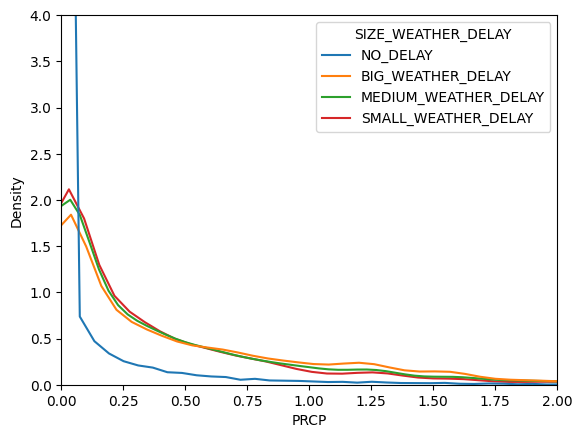

In [19]:
sns.kdeplot(
    df, x="PRCP", hue="SIZE_WEATHER_DELAY", common_norm=False,
)
plt.xlim(0,2)
plt.ylim(0,4)

<AxesSubplot: xlabel='AWND', ylabel='Density'>

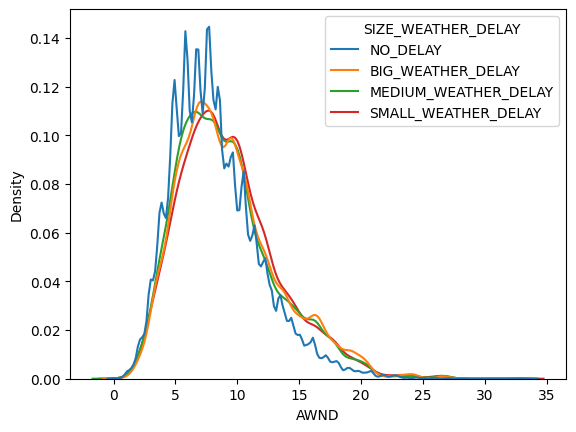

In [20]:
sns.kdeplot(
    df, x="AWND", hue="SIZE_WEATHER_DELAY", common_norm=False,
)

<AxesSubplot: xlabel='AWND', ylabel='Density'>

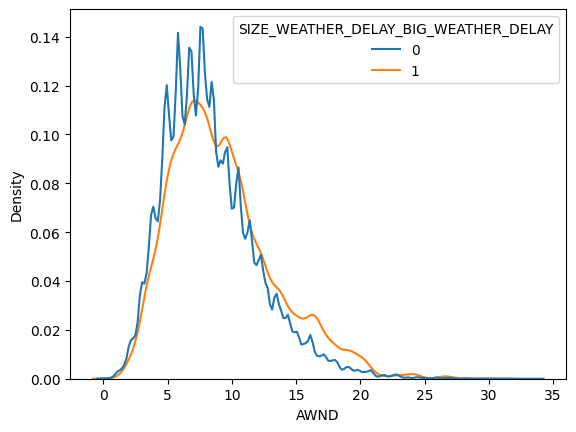

In [21]:
sns.kdeplot(
    df, x="AWND", hue="SIZE_WEATHER_DELAY_BIG_WEATHER_DELAY", common_norm=False,
)

## Airlines analysis

In [22]:
rank_df = df.groupby(['SIZE_DELAY']).CARRIER_NAME.value_counts(normalize=True).rename('Percentages').reset_index()

rank_df['rank'] = rank_df.sort_values(['Percentages'], ascending=[False]) \
             .groupby(['SIZE_DELAY']) \
             .cumcount() + 1

rank_df.head()

,SIZE_DELAY,CARRIER_NAME,Percentages,rank
0,BIG_DELAY,Southwest Airlines Co.,0.150131,1
1,BIG_DELAY,American Airlines Inc.,0.146930,2
2,BIG_DELAY,United Air Lines Inc.,0.115083,3
3,BIG_DELAY,SkyWest Airlines Inc.,0.104921,4
4,BIG_DELAY,Delta Air Lines Inc.,0.099582,5


In [23]:
df_dumbbell_airlines = df.query("SIZE_DELAY != 'NO_DELAY'") \
    .groupby(['CARRIER_NAME']) \
    .SIZE_DELAY.value_counts(normalize=True) \
    .rename('Percentages').reset_index() \
    .sort_values(by=['CARRIER_NAME', 'Percentages'], ascending=[True,False])

df_dumbbell_airlines.loc[df_dumbbell_airlines['SIZE_DELAY'] == 'SMALL_DELAY', 'size_number'] = 1
df_dumbbell_airlines.loc[df_dumbbell_airlines['SIZE_DELAY'] == 'MEDIUM_DELAY', 'size_number'] = 3
df_dumbbell_airlines.loc[df_dumbbell_airlines['SIZE_DELAY'] == 'BIG_DELAY', 'size_number'] = 10

In [24]:
fig = px.scatter(df_dumbbell_airlines, \
    x="Percentages", y="CARRIER_NAME", color="SIZE_DELAY", size='size_number', \
    category_orders={ 
        "SIZE_DELAY": ['SMALL_DELAY', 'MEDIUM_DELAY', 'BIG_DELAY'], \
        "CARRIER_NAME": df_dumbbell_airlines[df_dumbbell_airlines['SIZE_DELAY']=='BIG_DELAY'].sort_values(by='Percentages').CARRIER_NAME.unique()
        },
height=800)

for i in df_dumbbell_airlines["CARRIER_NAME"].unique():

    df_sub = df_dumbbell_airlines[df_dumbbell_airlines["CARRIER_NAME"] == i]
    
    fig.add_shape(
        type="line",
        layer="below",

        y0=df_sub.CARRIER_NAME.values[0], x0=df_sub.Percentages.values[0],
        y1=df_sub.CARRIER_NAME.values[1], x1=df_sub.Percentages.values[1], 
    )
fig.show()

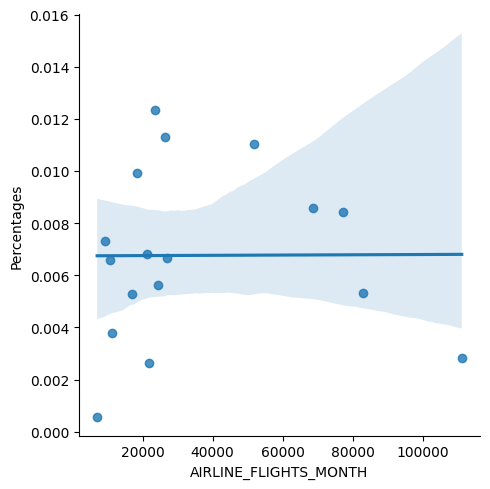

In [25]:
# Do airlines with a bigger perc of big delays have more flights per month?

df_lateaircraft_big_delay = df.groupby(['CARRIER_NAME']).SIZE_WEATHER_DELAY.value_counts(normalize=True) \
    .rename('Percentages').reset_index() \
    .sort_values(by=['CARRIER_NAME', 'Percentages'], ascending=[True,False])

df_airline_flights = (df_lateaircraft_big_delay[df_lateaircraft_big_delay['SIZE_WEATHER_DELAY']=='BIG_WEATHER_DELAY']
.merge(df.groupby('CARRIER_NAME').AIRLINE_FLIGHTS_MONTH.mean().reset_index(),
how='left'))

sns.lmplot(df_airline_flights, x='AIRLINE_FLIGHTS_MONTH', y='Percentages')

## Cause of delay distribution for each size of delay

In [26]:
df.groupby(['SIZE_DELAY']) \
        .CARRIER_DELAY.value_counts(normalize=True).rename('CARRIER_DELAY_PERC') \
        .reset_index() \
        .query("CARRIER_DELAY == 1").drop(columns='CARRIER_DELAY')

,SIZE_DELAY,CARRIER_DELAY_PERC
0,BIG_DELAY,0.535434
2,MEDIUM_DELAY,0.541212
6,SMALL_DELAY,0.300225


In [27]:
df.groupby(['SIZE_DELAY']) \
        .LATE_AIRCRAFT_DELAY.value_counts(normalize=True).rename('LATEAIRCRAFT_DELAY_PERC') \
        .reset_index() \
        .query("LATE_AIRCRAFT_DELAY == 1").drop(columns='LATE_AIRCRAFT_DELAY')

,SIZE_DELAY,LATEAIRCRAFT_DELAY_PERC
0,BIG_DELAY,0.641927
2,MEDIUM_DELAY,0.584689
6,SMALL_DELAY,0.272277


In [28]:
df.groupby(['SIZE_DELAY']) \
        .SECURITY_DELAY.value_counts(normalize=True).rename('SECURITY_DELAY_PERC') \
        .reset_index() \
        .query("SECURITY_DELAY == 1").drop(columns='SECURITY_DELAY')

,SIZE_DELAY,SECURITY_DELAY_PERC
1,BIG_DELAY,0.002644
3,MEDIUM_DELAY,0.003455
6,SMALL_DELAY,0.002145


In [29]:
df.groupby(['SIZE_DELAY']) \
        .NAS_DELAY.value_counts(normalize=True).rename('NAS_DELAY_PERC') \
        .reset_index() \
        .query("NAS_DELAY == 1").drop(columns='NAS_DELAY')

,SIZE_DELAY,NAS_DELAY_PERC
1,BIG_DELAY,0.388855
3,MEDIUM_DELAY,0.331953
6,SMALL_DELAY,0.265759


In [30]:
df.groupby(['SIZE_DELAY']) \
        .WEATHER_DELAY.value_counts(normalize=True).rename('WEATHER_DELAY_PERC') \
        .reset_index() \
        .query("WEATHER_DELAY == 1").drop(columns='WEATHER_DELAY')

,SIZE_DELAY,WEATHER_DELAY_PERC
1,BIG_DELAY,0.083130
3,MEDIUM_DELAY,0.049925
6,SMALL_DELAY,0.025000


In [31]:
df

,MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,SIZE_SECURITY_DELAY,SIZE_DELAY,SIZE_CARRIER_DELAY_BIG_CARRIER_DELAY,SIZE_CARRIER_DELAY_MEDIUM_CARRIER_DELAY,SIZE_CARRIER_DELAY_NO_DELAY,SIZE_CARRIER_DELAY_SMALL_CARRIER_DELAY,SIZE_WEATHER_DELAY_BIG_WEATHER_DELAY,SIZE_WEATHER_DELAY_MEDIUM_WEATHER_DELAY,SIZE_WEATHER_DELAY_NO_DELAY,SIZE_WEATHER_DELAY_SMALL_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY_BIG_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_MEDIUM_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_NO_DELAY,SIZE_LATE_AIRCRAFT_DELAY_SMALL_LATE_AIRCRAFT_DELAY,SIZE_CARRIER_DELAY,SIZE_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY
0,1,7,0.0,0,0800-0959,258.0,2,0.0,0.0,0.0,0.0,0.0,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
1,1,7,0.0,0,0600-0759,1747.0,7,0.0,0.0,0.0,0.0,0.0,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
2,1,7,0.0,0,0600-0759,1747.0,7,0.0,0.0,0.0,0.0,0.0,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
3,1,7,0.0,0,0600-0759,2248.0,9,0.0,0.0,0.0,0.0,0.0,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
4,1,7,0.0,0,0001-0559,1514.0,7,0.0,0.0,0.0,0.0,0.0,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489057,12,7,0.0,0,2200-2359,102.0,1,0.0,0.0,0.0,0.0,0.0,11,3,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
6489058,12,7,0.0,0,1800-1959,102.0,1,0.0,0.0,0.0,0.0,0.0,11,2,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,16,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
6489059,12,7,0.0,0,2000-2159,102.0,1,0.0,0.0,0.0,0.0,0.0,11,2,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY
6489060,12,7,0.0,0,2000-2159,102.0,1,0.0,0.0,0.0,0.0,0.0,12,3,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21,NO_DELAY,NO_DELAY,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY


In [32]:
df.groupby(['DAY_OF_WEEK','SIZE_DELAY']) \
        .CARRIER_DELAY.value_counts(normalize=True).rename('CARRIER_DELAY_PERC') \
        .reset_index() \
        .query("CARRIER_DELAY == 1").drop(columns='CARRIER_DELAY') \
        .query("SIZE_DELAY == 'BIG_DELAY'")

,DAY_OF_WEEK,SIZE_DELAY,CARRIER_DELAY_PERC
0,1,BIG_DELAY,0.528735
7,2,BIG_DELAY,0.521346
14,3,BIG_DELAY,0.502036
21,4,BIG_DELAY,0.521647
28,5,BIG_DELAY,0.543740
35,6,BIG_DELAY,0.579312
42,7,BIG_DELAY,0.561897


In [33]:
df.groupby(['DEP_TIME_BLK','SIZE_DELAY']) \
        .LATE_AIRCRAFT_DELAY.value_counts(normalize=True).rename('LATEAIRCRAFT_DELAY_PERC') \
        .reset_index() \
        .query("LATE_AIRCRAFT_DELAY == 1").drop(columns='LATE_AIRCRAFT_DELAY') \
        .query("SIZE_DELAY == 'BIG_DELAY'")

,DEP_TIME_BLK,SIZE_DELAY,LATEAIRCRAFT_DELAY_PERC
1,0001-0559,BIG_DELAY,0.236704
8,0600-0759,BIG_DELAY,0.203737
15,0800-0959,BIG_DELAY,0.445851
21,1000-1159,BIG_DELAY,0.607603
28,1200-1359,BIG_DELAY,0.644305
35,1400-1559,BIG_DELAY,0.662424
42,1600-1759,BIG_DELAY,0.693176
49,1800-1959,BIG_DELAY,0.753386
56,2000-2159,BIG_DELAY,0.748172
63,2200-2359,BIG_DELAY,0.690249


In [34]:
df.groupby(['DEP_TIME_BLK','SIZE_DELAY']) \
        .CARRIER_DELAY.value_counts(normalize=True).rename('CARRIER_DELAY_PERC') \
        .reset_index() \
        .query("CARRIER_DELAY == 1").drop(columns='CARRIER_DELAY') \
        .query("SIZE_DELAY == 'BIG_DELAY'")

,DEP_TIME_BLK,SIZE_DELAY,CARRIER_DELAY_PERC
0,0001-0559,BIG_DELAY,0.759051
7,0600-0759,BIG_DELAY,0.713140
14,0800-0959,BIG_DELAY,0.607963
21,1000-1159,BIG_DELAY,0.541860
28,1200-1359,BIG_DELAY,0.523559
35,1400-1559,BIG_DELAY,0.502582
43,1600-1759,BIG_DELAY,0.483973
50,1800-1959,BIG_DELAY,0.479023
56,2000-2159,BIG_DELAY,0.545642
63,2200-2359,BIG_DELAY,0.638499


In [35]:
df.groupby(['DEP_TIME_BLK']).CONCURRENT_FLIGHTS.mean()

DEP_TIME_BLK
0001-0559     9.075649
0600-0759    22.877540
0800-0959    33.388314
1000-1159    29.137478
1200-1359    27.088225
1400-1559    28.166652
1600-1759    26.951375
1800-1959    27.935562
2000-2159    32.142537
2200-2359    27.196145
Name: CONCURRENT_FLIGHTS, dtype: float64

## Proporción promedio de las causas más comunes de delay según tamaño de delay para las aeorlineas

In [36]:
def perc_delays(size_delay):

    carrier_delay_perc = df.query(f"SIZE_DELAY == '{size_delay}'")  \
        .groupby(['CARRIER_NAME']) \
        .CARRIER_DELAY.value_counts(normalize=True).rename('CARRIER_DELAY_PERC') \
        .reset_index() \
        .query("CARRIER_DELAY == 1").drop(columns='CARRIER_DELAY')

    lateairc_delay_perc = df.query(f"SIZE_DELAY == '{size_delay}'")  \
        .groupby(['CARRIER_NAME']) \
        .LATE_AIRCRAFT_DELAY.value_counts(normalize=True).rename('LATEAIRCRAFT_DELAY_PERC') \
        .reset_index() \
        .query("LATE_AIRCRAFT_DELAY == 1").drop(columns='LATE_AIRCRAFT_DELAY')

    security_delay_perc = df.query(f"SIZE_DELAY == '{size_delay}'")  \
        .groupby(['CARRIER_NAME']) \
        .SECURITY_DELAY.value_counts(normalize=True).rename('SECURITY_DELAY_PERC') \
        .reset_index() \
        .query("SECURITY_DELAY == 1").drop(columns='SECURITY_DELAY')

    nas_delay_perc = df.query(f"SIZE_DELAY == '{size_delay}'")  \
        .groupby(['CARRIER_NAME']) \
        .NAS_DELAY.value_counts(normalize=True).rename('NAS_DELAY_PERC') \
        .reset_index() \
        .query("NAS_DELAY == 1").drop(columns='NAS_DELAY')

    weather_delay_perc = df.query(f"SIZE_DELAY == '{size_delay}'")  \
        .groupby(['CARRIER_NAME']) \
        .WEATHER_DELAY.value_counts(normalize=True).rename('WEATHER_DELAY_PERC') \
        .reset_index() \
        .query("WEATHER_DELAY == 1").drop(columns='WEATHER_DELAY')

    return carrier_delay_perc, lateairc_delay_perc, security_delay_perc, nas_delay_perc, weather_delay_perc

In [37]:
carrier_delay_perc, lateairc_delay_perc, security_delay_perc, nas_delay_perc, weather_delay_perc = perc_delays('BIG_DELAY')

df_dumbbell_airlines.query("SIZE_DELAY == 'BIG_DELAY'") \
    .merge( 
    carrier_delay_perc.merge(lateairc_delay_perc, how='outer') \
    .merge(security_delay_perc, how='outer') \
    .merge(nas_delay_perc, how='outer') \
    .merge(weather_delay_perc, how='outer') 
    , how='left').drop(columns=['SIZE_DELAY', 'size_number']).fillna(0).mean(axis=0)

/var/folders/mr/00bdgfv15z96v_xlq0mdz5pc0000gn/T/ipykernel_1475/3098345826.py:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Percentages                0.364931
CARRIER_DELAY_PERC         0.526764
LATEAIRCRAFT_DELAY_PERC    0.611924
SECURITY_DELAY_PERC        0.004456
NAS_DELAY_PERC             0.400151
WEATHER_DELAY_PERC         0.079372
dtype: float64

In [38]:
carrier_delay_perc, lateairc_delay_perc, security_delay_perc, nas_delay_perc, weather_delay_perc = perc_delays('MEDIUM_DELAY')

df_dumbbell_airlines.query("SIZE_DELAY == 'MEDIUM_DELAY'") \
    .merge( 
    carrier_delay_perc.merge(lateairc_delay_perc, how='outer') \
    .merge(security_delay_perc, how='outer') \
    .merge(nas_delay_perc, how='outer') \
    .merge(weather_delay_perc, how='outer') 
    , how='left').drop(columns=['SIZE_DELAY', 'size_number']).fillna(0).mean(axis=0)

/var/folders/mr/00bdgfv15z96v_xlq0mdz5pc0000gn/T/ipykernel_1475/1082714712.py:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Percentages                0.288730
CARRIER_DELAY_PERC         0.504215
LATEAIRCRAFT_DELAY_PERC    0.555483
SECURITY_DELAY_PERC        0.003965
NAS_DELAY_PERC             0.360616
WEATHER_DELAY_PERC         0.054419
dtype: float64

In [39]:
carrier_delay_perc, lateairc_delay_perc, security_delay_perc, nas_delay_perc, weather_delay_perc = perc_delays('SMALL_DELAY')

df_dumbbell_airlines.query("SIZE_DELAY == 'SMALL_DELAY'") \
    .merge( 
    carrier_delay_perc.merge(lateairc_delay_perc, how='outer') \
    .merge(security_delay_perc, how='outer') \
    .merge(nas_delay_perc, how='outer') \
    .merge(weather_delay_perc, how='outer') 
    , how='left').drop(columns=['SIZE_DELAY', 'size_number']).fillna(0).mean(axis=0)

/var/folders/mr/00bdgfv15z96v_xlq0mdz5pc0000gn/T/ipykernel_1475/2538915951.py:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Percentages                0.346340
CARRIER_DELAY_PERC         0.305341
LATEAIRCRAFT_DELAY_PERC    0.285792
SECURITY_DELAY_PERC        0.002889
NAS_DELAY_PERC             0.294704
WEATHER_DELAY_PERC         0.031830
dtype: float64

In [40]:
df.groupby('SIZE_DELAY').CONCURRENT_FLIGHTS.mean()

SIZE_DELAY
BIG_DELAY       28.006680
MEDIUM_DELAY    28.442470
NO_DELAY        27.742964
SMALL_DELAY     28.296569
Name: CONCURRENT_FLIGHTS, dtype: float64

In [41]:
df[df['LATE_AIRCRAFT_DELAY']==1].groupby('SIZE_DELAY').CONCURRENT_FLIGHTS.mean()

SIZE_DELAY
BIG_DELAY       27.753152
MEDIUM_DELAY    27.325996
SMALL_DELAY     27.533864
Name: CONCURRENT_FLIGHTS, dtype: float64

In [42]:
df[(df['LATE_AIRCRAFT_DELAY']==1) | (df['SIZE_DELAY']=='NO_DELAY')].groupby('SIZE_DELAY').DISTANCE.mean()

SIZE_DELAY
BIG_DELAY       812.121953
MEDIUM_DELAY    789.993399
NO_DELAY        832.654497
SMALL_DELAY     754.454009
Name: DISTANCE, dtype: float64

<AxesSubplot: xlabel='PRCP', ylabel='SIZE_DELAY'>

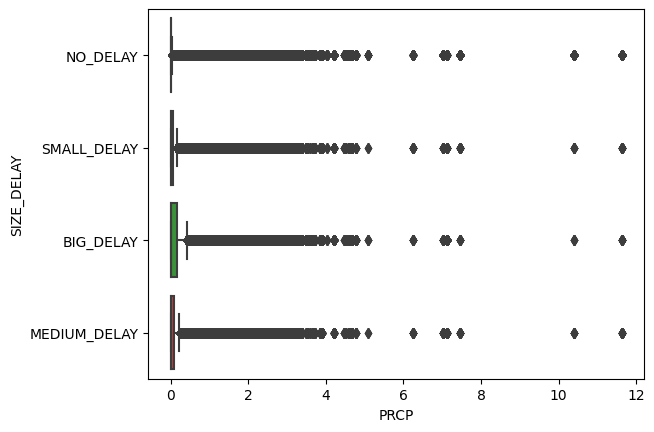

In [43]:
sns.boxplot(data=df, x="PRCP", y="SIZE_DELAY")

In [44]:
df.groupby(['SIZE_WEATHER_DELAY']).PRCP.median()

SIZE_WEATHER_DELAY
BIG_WEATHER_DELAY       0.22
MEDIUM_WEATHER_DELAY    0.17
NO_DELAY                0.00
SMALL_WEATHER_DELAY     0.14
Name: PRCP, dtype: float64

In [45]:
df.groupby(['MONTH','SIZE_WEATHER_DELAY']).PRCP.median().reset_index()

,MONTH,SIZE_WEATHER_DELAY,PRCP
0,1,BIG_WEATHER_DELAY,0.040
1,1,MEDIUM_WEATHER_DELAY,0.030
2,1,NO_DELAY,0.000
3,1,SMALL_WEATHER_DELAY,0.030
4,2,BIG_WEATHER_DELAY,0.140
5,2,MEDIUM_WEATHER_DELAY,0.140
6,2,NO_DELAY,0.000
7,2,SMALL_WEATHER_DELAY,0.100
8,3,BIG_WEATHER_DELAY,0.270
9,3,MEDIUM_WEATHER_DELAY,0.180


## States by zone

In [47]:
# Add States
geolocator = Nominatim(user_agent="http")

airports = df[['DEPARTING_AIRPORT', 'LATITUDE', 'LONGITUDE']].drop_duplicates().reset_index(drop=True)
airports_col = airports.apply(lambda col: geolocator.reverse((col.LATITUDE, col.LONGITUDE)).raw['address']['ISO3166-2-lvl4'][-2:], axis=1)

airports = airports.reset_index(drop=True)
airports['state'] = airports_col
df = df.merge(airports[['DEPARTING_AIRPORT', 'state']], on='DEPARTING_AIRPORT')

In [48]:
df = df.merge(pd.read_csv('us census bureau regions and divisions.csv')[['State Code', 'Region']], 
    left_on='state', right_on='State Code', how='left') \
    .drop(columns='State Code')

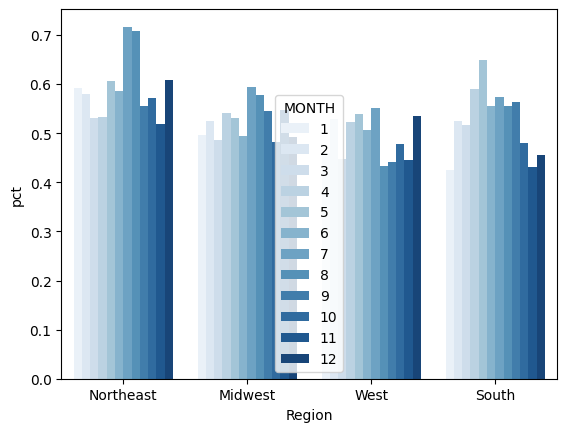

In [50]:
# qué porcentaje de sus weather delays son big delays
df_prov = df[df['SIZE_WEATHER_DELAY']!='NO_DELAY'].groupby(['MONTH','Region']) \
			.SIZE_WEATHER_DELAY.value_counts(normalize=True) \
			.rename('pct').reset_index() \
			.sort_values(by=['MONTH', 'SIZE_WEATHER_DELAY', 'pct'], ascending=[True,True,False]) \
			.query("SIZE_WEATHER_DELAY == 'BIG_WEATHER_DELAY'")#.query("MONTH in [1,2,3,4,5,6]")

sns.barplot(x = 'Region',
			y = 'pct',
			hue = 'MONTH',
			data = df_prov,
			palette = "Blues")

plt.show()


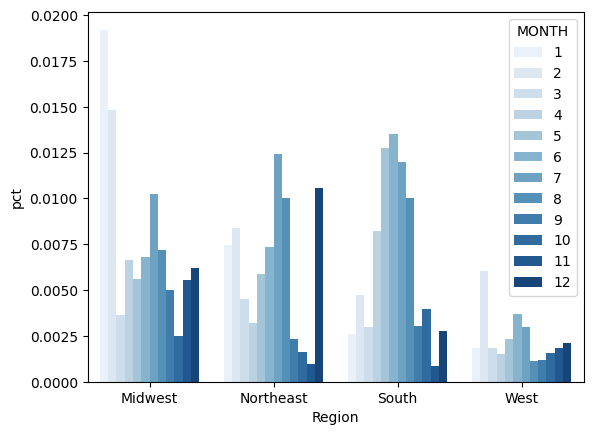

In [58]:
# qué porcentaje de los aviones que parten desde esa región tienen big weather delays
df_prov = df.groupby(['MONTH','Region']) \
			.SIZE_WEATHER_DELAY_BIG_WEATHER_DELAY.mean() \
			.rename('pct').reset_index() \

sns.barplot(x = 'Region',
			y = 'pct',
			hue = 'MONTH',
			data = df_prov,
			palette = "Blues")

plt.show()

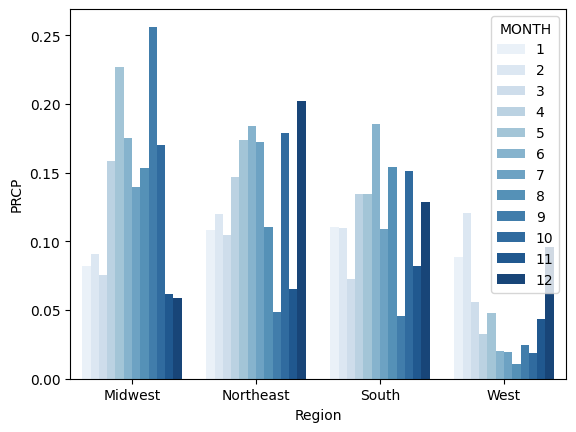

In [64]:
df_prov = df.groupby(['MONTH','Region']) \
			.PRCP.mean().reset_index() \

sns.barplot(x = 'Region',
			y = 'PRCP',
			hue = 'MONTH',
			data = df_prov,
			palette = "Blues")

plt.show()

In [ ]:
df.groupby(['Region','SIZE_DELAY']) \
        .WEATHER_DELAY.value_counts(normalize=True).rename('WEATHER_DELAY_PERC') \
        .reset_index() \
        .query("WEATHER_DELAY == 1").drop(columns='WEATHER_DELAY')

,Region,SIZE_DELAY,WEATHER_DELAY_PERC
1,Midwest,BIG_DELAY,0.110601
3,Midwest,MEDIUM_DELAY,0.071166
6,Midwest,SMALL_DELAY,0.041929
8,Northeast,BIG_DELAY,0.073205
10,Northeast,MEDIUM_DELAY,0.041389
13,Northeast,SMALL_DELAY,0.023572
15,South,BIG_DELAY,0.098681
17,South,MEDIUM_DELAY,0.060536
20,South,SMALL_DELAY,0.026716
22,West,BIG_DELAY,0.042349


In [ ]:
df.groupby(['Region','SIZE_DELAY']) \
        .CARRIER_DELAY.value_counts(normalize=True).rename('CARRIER_DELAY_PERC') \
        .reset_index() \
        .query("CARRIER_DELAY == 1").drop(columns='CARRIER_DELAY')

,Region,SIZE_DELAY,CARRIER_DELAY_PERC
0,Midwest,BIG_DELAY,0.508563
2,Midwest,MEDIUM_DELAY,0.509355
6,Midwest,SMALL_DELAY,0.281082
7,Northeast,BIG_DELAY,0.543739
9,Northeast,MEDIUM_DELAY,0.512868
13,Northeast,SMALL_DELAY,0.280303
14,South,BIG_DELAY,0.533923
16,South,MEDIUM_DELAY,0.564507
20,South,SMALL_DELAY,0.319216
21,West,BIG_DELAY,0.552196


In [ ]:
df.groupby(['Region','SIZE_DELAY']) \
        .LATE_AIRCRAFT_DELAY.value_counts(normalize=True).rename('LATEAIRCRAFT_DELAY_PERC') \
        .reset_index() \
        .query("LATE_AIRCRAFT_DELAY == 1").drop(columns='LATE_AIRCRAFT_DELAY')

,Region,SIZE_DELAY,LATEAIRCRAFT_DELAY_PERC
0,Midwest,BIG_DELAY,0.619030
2,Midwest,MEDIUM_DELAY,0.571312
6,Midwest,SMALL_DELAY,0.269792
7,Northeast,BIG_DELAY,0.689364
9,Northeast,MEDIUM_DELAY,0.589706
13,Northeast,SMALL_DELAY,0.265628
14,South,BIG_DELAY,0.634366
16,South,MEDIUM_DELAY,0.578886
20,South,SMALL_DELAY,0.273508
21,West,BIG_DELAY,0.638708


In [ ]:
df.groupby(['Region','SIZE_DELAY']) \
        .SECURITY_DELAY.value_counts(normalize=True).rename('SECURITY_DELAY_PERC') \
        .reset_index() \
        .query("SECURITY_DELAY == 1").drop(columns='SECURITY_DELAY')

,Region,SIZE_DELAY,SECURITY_DELAY_PERC
1,Midwest,BIG_DELAY,0.001545
3,Midwest,MEDIUM_DELAY,0.001806
6,Midwest,SMALL_DELAY,0.001241
8,Northeast,BIG_DELAY,0.002619
10,Northeast,MEDIUM_DELAY,0.002449
13,Northeast,SMALL_DELAY,0.001752
15,South,BIG_DELAY,0.002932
17,South,MEDIUM_DELAY,0.004274
20,South,SMALL_DELAY,0.002526
22,West,BIG_DELAY,0.002962


In [ ]:
df.groupby(['Region','SIZE_DELAY']) \
        .NAS_DELAY.value_counts(normalize=True).rename('NAS_DELAY_PERC') \
        .reset_index() \
        .query("NAS_DELAY == 1").drop(columns='NAS_DELAY')

,Region,SIZE_DELAY,NAS_DELAY_PERC
1,Midwest,BIG_DELAY,0.418418
3,Midwest,MEDIUM_DELAY,0.356367
6,Midwest,SMALL_DELAY,0.286727
8,Northeast,BIG_DELAY,0.433106
10,Northeast,MEDIUM_DELAY,0.384865
13,Northeast,SMALL_DELAY,0.312329
15,South,BIG_DELAY,0.378747
17,South,MEDIUM_DELAY,0.325942
20,South,SMALL_DELAY,0.265569
22,West,BIG_DELAY,0.353387
